# Model Learning Rate


* How to configure and evaluate a time-based learning rate schedule.
* How to configure and evaluate a drop-based learning rate schedule.


### Time based learning rate....

['acc', 'loss', 'val_acc', 'val_loss']


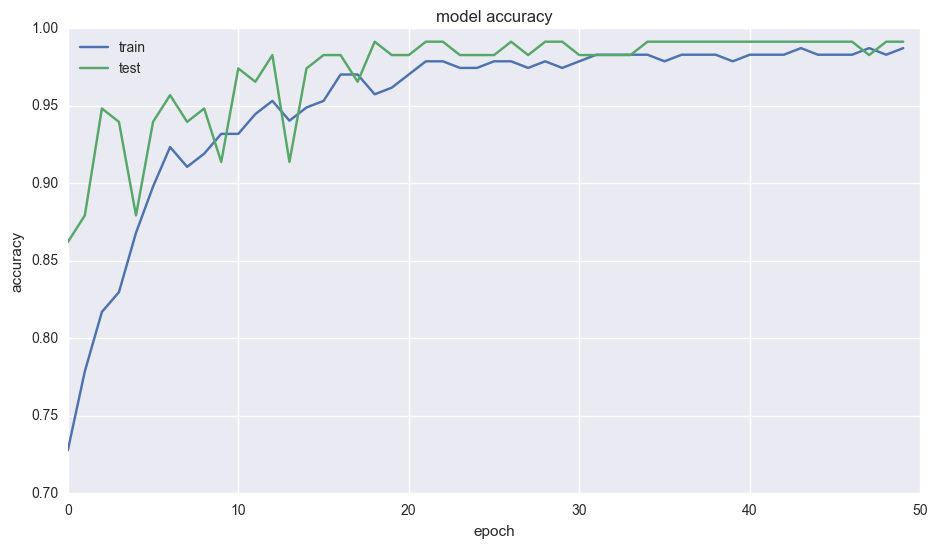

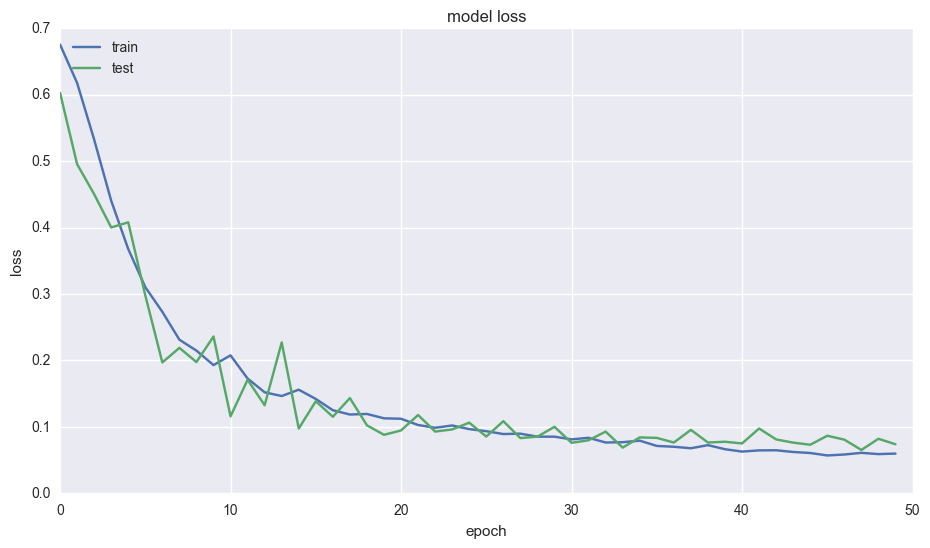

In [9]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load dataset
dataframe = pd.read_csv("data/ionosphere.csv", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(34, input_dim=34, init='normal', activation='relu'))
model.add(Dense(1, init='normal', activation='sigmoid'))

# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, nb_epoch=epochs, batch_size=28, verbose=0)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
f, ax = plt.subplots(figsize=(11, 6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
f, ax = plt.subplots(figsize=(11, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Drop-based learning rate schedule...

['acc', 'loss', 'val_acc', 'val_loss']


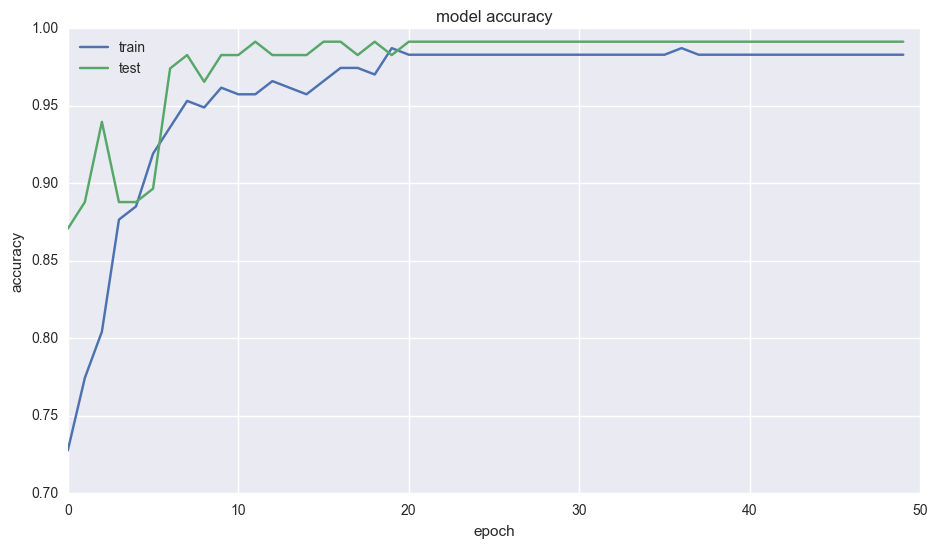

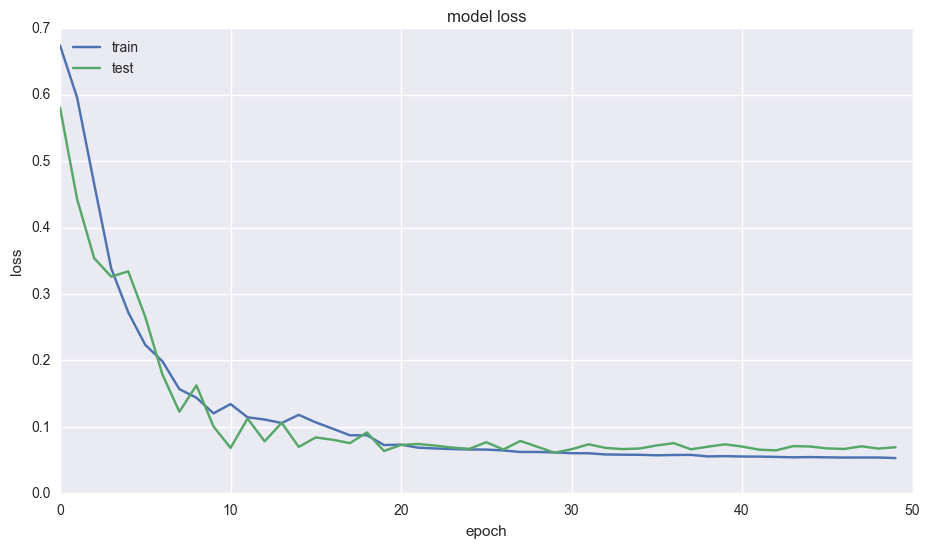

In [10]:
# Drop-Based Learning Rate Decay
import pandas as pd
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import LearningRateScheduler

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load dataset
dataframe = pd.read_csv("data/ionosphere.csv", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(34, input_dim=34, init='normal', activation='relu'))
model.add(Dense(1, init='normal', activation='sigmoid'))

# Compile model
sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

# Fit the model
history = model.fit(X, Y, validation_split=0.33, nb_epoch=50, batch_size=28, callbacks=callbacks_list, verbose=0)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
f, ax = plt.subplots(figsize=(11, 6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
f, ax = plt.subplots(figsize=(11, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Tips...

* Increase the initial learning rate. Because the learning rate will decrease, start with a larger value to decrease from. A larger learning rate will result in a lot larger changes to the weights, at least in the beginning, allowing to benefit from the tuning later.

* Use a large momentum. Using a larger momentum value will help the optimization algorithm to continue to make updates in the right direction when the learning rate shrinks to small values.

* Experiment with different schedules. It will not be clear which learning rate schedule to use so try a few with different conguration options and see what works best.